**Seleksi Unvariate**

In [1]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# memilih data yang dibutuhkan
X = data.iloc[:,0:14]
y = data.iloc[:,-1]

In [6]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [7]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Analysis','Score']
print(featureScores.nlargest(10,'Score'))

    Analysis       Score
7   thalachh  188.320472
13    output  138.000000
9    oldpeak   72.644253
11       caa   66.440765
2         cp   62.598098
8       exng   38.914377
4       chol   23.936394
0        age   23.286624
3     trtbps   14.823925
10       slp    9.804095


**Feature Importance**



In [8]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [9]:
# memuat data
data = pd.read_csv("heart.csv")
X = data.iloc[:,0:14]
y = data.iloc[:,-1]

In [10]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.01186928 0.02437443 0.06026977 0.00971069 0.00933604 0.0046373
 0.00831421 0.01912201 0.05410815 0.02611001 0.03226851 0.03908483
 0.04407829 0.65671648]


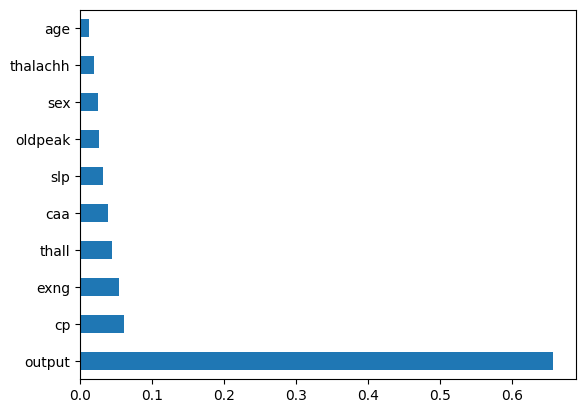

In [11]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Matriks Korelasi dengan Heatmap**

In [12]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
# memuat data
data = pd.read_csv("heart.csv")
X = data.iloc[:,0:14]
y = data.iloc[:,-1]

In [14]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr()
top_corr_features = corrmat.index

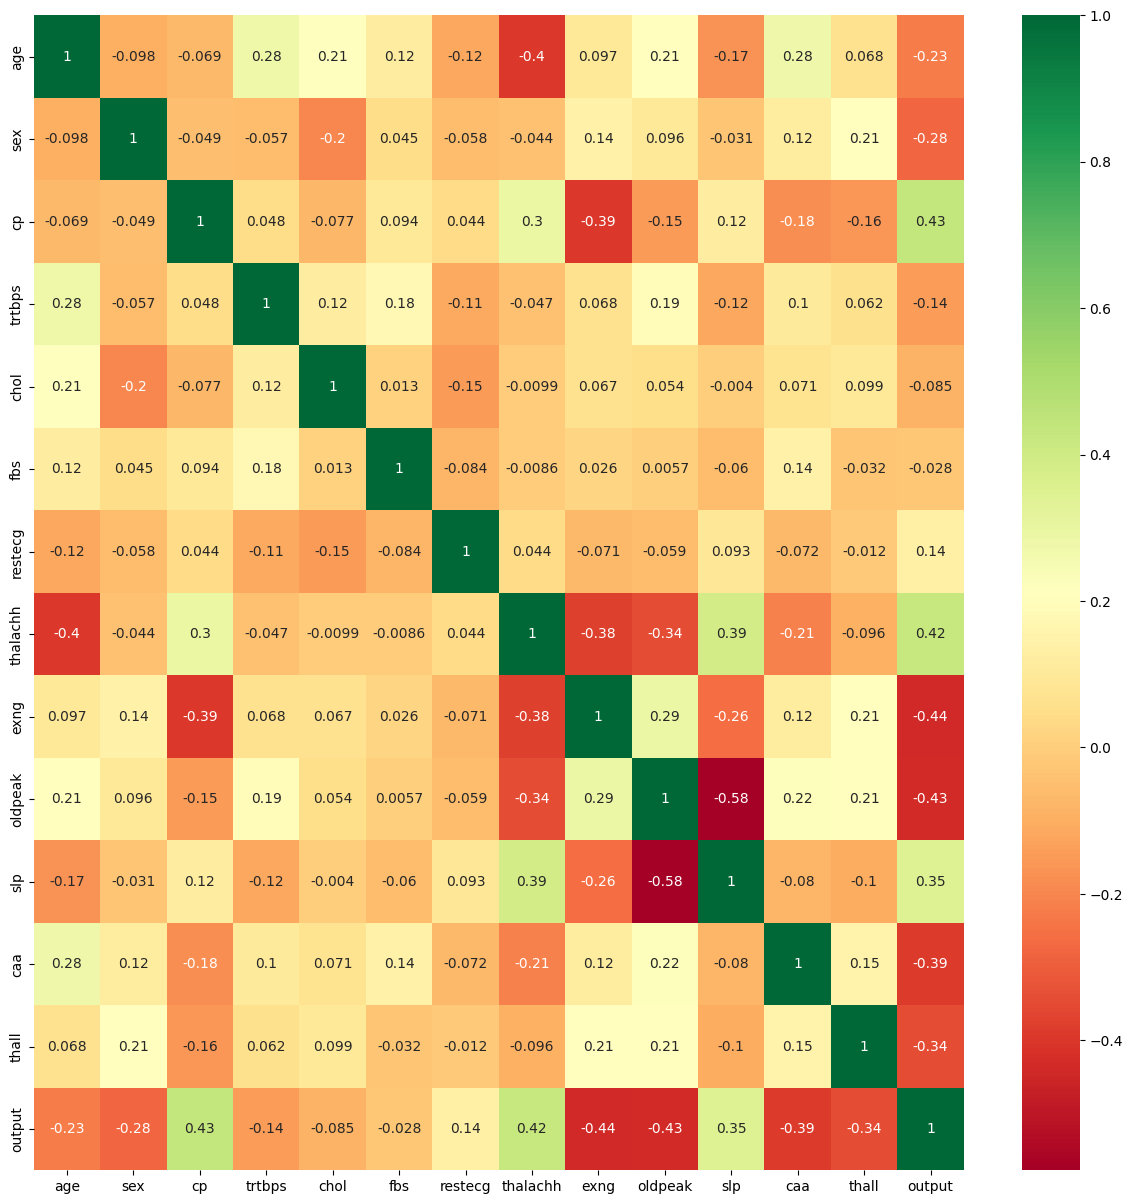

In [17]:
# plot heatmap
plt.figure(figsize=(15,15))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Kesimpulan**

*   Dapat dilihat bahwa pada kolom output korelasi yang paling kuat terjadi pada variable thalachh dan cp, lalu diikuti oleh slp dan restecg
*   Dan terlihat bahwa relasi yang lemah terjadi pada variable exng dan oldpeak

